# Libraries and Global Variables

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import f_regression
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import re
import pickle
from sklearn.metrics import cohen_kappa_score

In [0]:
csv_path = 'Class Notebooks/datasets/predictive_maintenance_timestamp.csv'
pickle_path = 'Predictive maintenance pickles'

In [385]:
df = pd.read_csv(csv_path)
df.head()

,timestamp,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,...,s13,s14,s15,s16,s17,s18,s19,s20,s21,ttf
0,2019-01-01 00:00:00,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,...,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,191
1,2019-01-01 00:00:30,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,...,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,190
2,2019-01-01 00:01:00,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,...,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,189
3,2019-01-01 00:01:30,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,...,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,188
4,2019-01-01 00:02:00,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,...,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,187


# Preprocessing

In [386]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.set_index('timestamp', inplace=True)
df.cycle.value_counts()

16     100
40     100
1      100
17     100
2      100
      ... 
357      1
356      1
355      1
354      1
351      1
Name: cycle, Length: 362, dtype: int64

In [387]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20631 entries, 2019-01-01 00:00:00 to 2019-01-08 03:55:00
Data columns (total 27 columns):
id          20631 non-null int64
cycle       20631 non-null int64
setting1    20631 non-null float64
setting2    20631 non-null float64
setting3    20631 non-null float64
s1          20631 non-null float64
s2          20631 non-null float64
s3          20631 non-null float64
s4          20631 non-null float64
s5          20631 non-null float64
s6          20631 non-null float64
s7          20631 non-null float64
s8          20631 non-null float64
s9          20631 non-null float64
s10         20631 non-null float64
s11         20631 non-null float64
s12         20631 non-null float64
s13         20631 non-null float64
s14         20631 non-null float64
s15         20631 non-null float64
s16         20631 non-null float64
s17         20631 non-null int64
s18         20631 non-null int64
s19         20631 non-null float64
s20         20631 non-nu

In [388]:
df['id'].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100])

In [389]:
df.groupby('id').size()

id
1      192
2      287
3      179
4      189
5      269
      ... 
96     336
97     202
98     156
99     185
100    200
Length: 100, dtype: int64

In [390]:
start_time = df[df.cycle == 1].index
start_time

DatetimeIndex(['2019-01-01 00:00:00', '2019-01-01 01:36:00',
               '2019-01-01 03:59:30', '2019-01-01 05:29:00',
               '2019-01-01 07:03:30', '2019-01-01 09:18:00',
               '2019-01-01 10:52:00', '2019-01-01 13:01:30',
               '2019-01-01 14:16:30', '2019-01-01 15:57:00',
               '2019-01-01 17:48:00', '2019-01-01 19:48:00',
               '2019-01-01 21:13:00', '2019-01-01 22:34:30',
               '2019-01-02 00:04:30', '2019-01-02 01:48:00',
               '2019-01-02 03:32:30', '2019-01-02 05:50:30',
               '2019-01-02 07:28:00', '2019-01-02 08:47:00',
               '2019-01-02 10:44:00', '2019-01-02 12:21:30',
               '2019-01-02 14:02:30', '2019-01-02 15:26:30',
               '2019-01-02 16:40:00', '2019-01-02 18:35:00',
               '2019-01-02 20:14:30', '2019-01-02 21:32:30',
               '2019-01-02 22:55:00', '2019-01-03 00:16:30',
               '2019-01-03 01:53:30', '2019-01-03 03:50:30',
               '2019-01-

In [391]:
end_time = df[df.ttf == 0].index
end_time

DatetimeIndex(['2019-01-01 01:35:30', '2019-01-01 03:59:00',
               '2019-01-01 05:28:30', '2019-01-01 07:03:00',
               '2019-01-01 09:17:30', '2019-01-01 10:51:30',
               '2019-01-01 13:01:00', '2019-01-01 14:16:00',
               '2019-01-01 15:56:30', '2019-01-01 17:47:30',
               '2019-01-01 19:47:30', '2019-01-01 21:12:30',
               '2019-01-01 22:34:00', '2019-01-02 00:04:00',
               '2019-01-02 01:47:30', '2019-01-02 03:32:00',
               '2019-01-02 05:50:00', '2019-01-02 07:27:30',
               '2019-01-02 08:46:30', '2019-01-02 10:43:30',
               '2019-01-02 12:21:00', '2019-01-02 14:02:00',
               '2019-01-02 15:26:00', '2019-01-02 16:39:30',
               '2019-01-02 18:34:30', '2019-01-02 20:14:00',
               '2019-01-02 21:32:00', '2019-01-02 22:54:30',
               '2019-01-03 00:16:00', '2019-01-03 01:53:00',
               '2019-01-03 03:50:00', '2019-01-03 05:25:30',
               '2019-01-

In [392]:
time_delta = end_time - start_time
time_delta

TimedeltaIndex(['01:35:30', '02:23:00', '01:29:00', '01:34:00', '02:14:00',
                '01:33:30', '02:09:00', '01:14:30', '01:40:00', '01:50:30',
                '01:59:30', '01:24:30', '01:21:00', '01:29:30', '01:43:00',
                '01:44:00', '02:17:30', '01:37:00', '01:18:30', '01:56:30',
                '01:37:00', '01:40:30', '01:23:30', '01:13:00', '01:54:30',
                '01:39:00', '01:17:30', '01:22:00', '01:21:00', '01:36:30',
                '01:56:30', '01:35:00', '01:39:30', '01:37:00', '01:30:00',
                '01:18:30', '01:24:30', '01:36:30', '01:03:30', '01:33:30',
                '01:47:30', '01:37:30', '01:43:00', '01:35:30', '01:18:30',
                '02:07:30', '01:46:30', '01:55:00', '01:47:00', '01:38:30',
                '01:46:00', '01:46:00', '01:37:00', '02:08:00', '01:36:00',
                '02:17:00', '01:08:00', '01:13:00', '01:55:00', '01:25:30',
                '01:32:00', '01:29:30', '01:26:30', '02:21:00', '01:16:00',
            

In [393]:
time_delta = time_delta.to_frame()
time_delta

,timestamp
timestamp,
01:35:30,01:35:30
02:23:00,02:23:00
01:29:00,01:29:00
01:34:00,01:34:00
02:14:00,02:14:00
...,...
02:47:30,02:47:30
01:40:30,01:40:30
01:17:30,01:17:30


In [394]:
time_delta['timestamp'] = pd.to_timedelta(time_delta['timestamp'])
time_delta['timestamp']

timestamp
01:35:30   01:35:30
02:23:00   02:23:00
01:29:00   01:29:00
01:34:00   01:34:00
02:14:00   02:14:00
             ...   
02:47:30   02:47:30
01:40:30   01:40:30
01:17:30   01:17:30
01:32:00   01:32:00
01:39:30   01:39:30
Name: timestamp, Length: 100, dtype: timedelta64[ns]

In [395]:
time_delta['timestamp'].mean()

Timedelta('0 days 01:42:39.300000')

In [396]:
df.head()

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,s13,s14,s15,s16,s17,s18,s19,s20,s21,ttf
timestamp,,,,,,,,,,,,,,,,,,,,,
2019-01-01 00:00:00,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,191
2019-01-01 00:00:30,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,190
2019-01-01 00:01:00,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,189
2019-01-01 00:01:30,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,188
2019-01-01 00:02:00,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,187


In [397]:
df.loc[:,'s1': 's21'].describe()

,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,...,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21
count,20631.00,20631.000000,20631.000000,20631.000000,2.063100e+04,20631.000000,20631.000000,20631.000000,20631.000000,20631.0,...,20631.000000,20631.000000,20631.000000,20631.000000,2.063100e+04,20631.000000,20631.0,20631.0,20631.000000,20631.000000
mean,518.67,642.680934,1590.523119,1408.933782,1.462000e+01,21.609803,553.367711,2388.096652,9065.242941,1.3,...,521.413470,2388.096152,8143.752722,8.442146,3.000000e-02,393.210654,2388.0,100.0,38.816271,23.289705
std,0.00,0.500053,6.131150,9.000605,1.776400e-15,0.001389,0.885092,0.070985,22.082880,0.0,...,0.737553,0.071919,19.076176,0.037505,1.387812e-17,1.548763,0.0,0.0,0.180746,0.108251
min,518.67,641.210000,1571.040000,1382.250000,1.462000e+01,21.600000,549.850000,2387.900000,9021.730000,1.3,...,518.690000,2387.880000,8099.940000,8.324900,3.000000e-02,388.000000,2388.0,100.0,38.140000,22.894200
25%,518.67,642.325000,1586.260000,1402.360000,1.462000e+01,21.610000,552.810000,2388.050000,9053.100000,1.3,...,520.960000,2388.040000,8133.245000,8.414900,3.000000e-02,392.000000,2388.0,100.0,38.700000,23.221800
50%,518.67,642.640000,1590.100000,1408.040000,1.462000e+01,21.610000,553.440000,2388.090000,9060.660000,1.3,...,521.480000,2388.090000,8140.540000,8.438900,3.000000e-02,393.000000,2388.0,100.0,38.830000,23.297900
75%,518.67,643.000000,1594.380000,1414.555000,1.462000e+01,21.610000,554.010000,2388.140000,9069.420000,1.3,...,521.950000,2388.140000,8148.310000,8.465600,3.000000e-02,394.000000,2388.0,100.0,38.950000,23.366800
max,518.67,644.530000,1616.910000,1441.490000,1.462000e+01,21.610000,556.060000,2388.560000,9244.590000,1.3,...,523.380000,2388.560000,8293.720000,8.584800,3.000000e-02,400.000000,2388.0,100.0,39.430000,23.618400


In [398]:
df.loc[:,'s1': 's21'].describe().loc['std'].sort_values(ascending=False).round(4)

s9     22.0829
s14    19.0762
s4      9.0006
s3      6.1311
s17     1.5488
s7      0.8851
s12     0.7376
s2      0.5001
s11     0.2671
s20     0.1807
s21     0.1083
s13     0.0719
s8      0.0710
s15     0.0375
s6      0.0014
s5      0.0000
s16     0.0000
s10     0.0000
s18     0.0000
s19     0.0000
s1      0.0000
Name: std, dtype: float64

In [399]:
df.drop(['s5', 's6','s16', 's10', 's18', 's19', 's1'], 1, inplace=True)
df.head()

,id,cycle,setting1,setting2,setting3,s2,s3,s4,s7,s8,s9,s11,s12,s13,s14,s15,s17,s20,s21,ttf
timestamp,,,,,,,,,,,,,,,,,,,,
2019-01-01 00:00:00,1,1,-0.0007,-0.0004,100.0,641.82,1589.70,1400.60,554.36,2388.06,9046.19,47.47,521.66,2388.02,8138.62,8.4195,392,39.06,23.4190,191
2019-01-01 00:00:30,1,2,0.0019,-0.0003,100.0,642.15,1591.82,1403.14,553.75,2388.04,9044.07,47.49,522.28,2388.07,8131.49,8.4318,392,39.00,23.4236,190
2019-01-01 00:01:00,1,3,-0.0043,0.0003,100.0,642.35,1587.99,1404.20,554.26,2388.08,9052.94,47.27,522.42,2388.03,8133.23,8.4178,390,38.95,23.3442,189
2019-01-01 00:01:30,1,4,0.0007,0.0000,100.0,642.35,1582.79,1401.87,554.45,2388.11,9049.48,47.13,522.86,2388.08,8133.83,8.3682,392,38.88,23.3739,188
2019-01-01 00:02:00,1,5,-0.0019,-0.0002,100.0,642.37,1582.85,1406.22,554.00,2388.06,9055.15,47.28,522.19,2388.04,8133.80,8.4294,393,38.90,23.4044,187


# EDA

In [400]:
df.corr()['ttf'].to_frame()

,ttf
id,0.078753
cycle,-0.736241
setting1,-0.003198
setting2,-0.001948
setting3,NaN
s2,-0.606484
s3,-0.584520
s4,-0.678948
s7,0.657223
s8,-0.563968


# Regressors Vs TTF

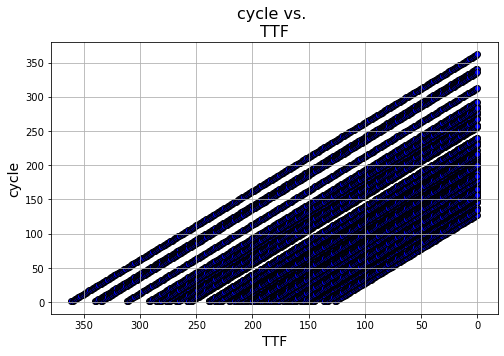

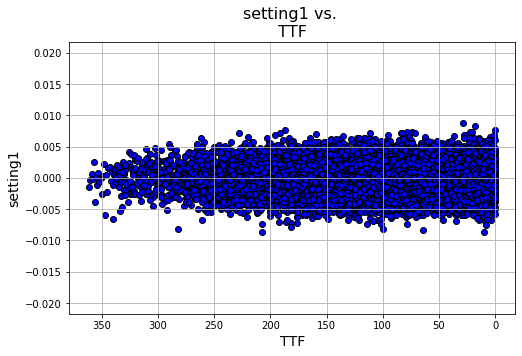

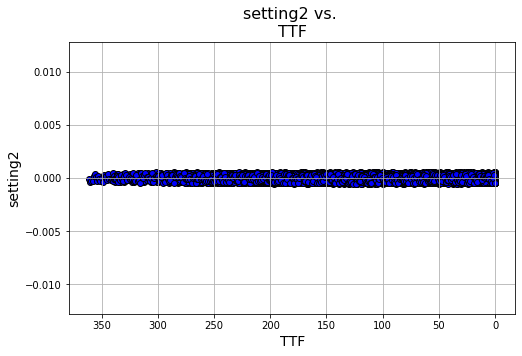

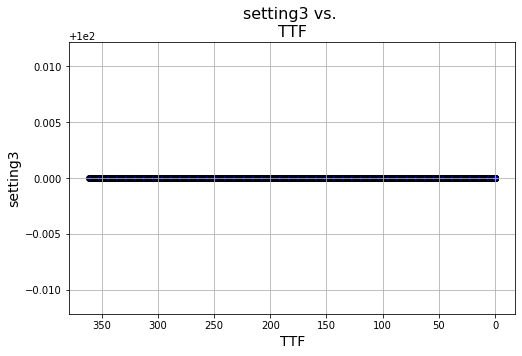

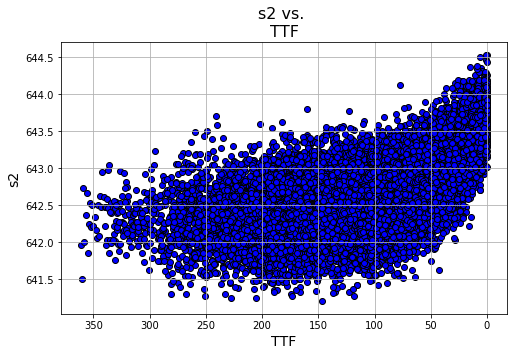

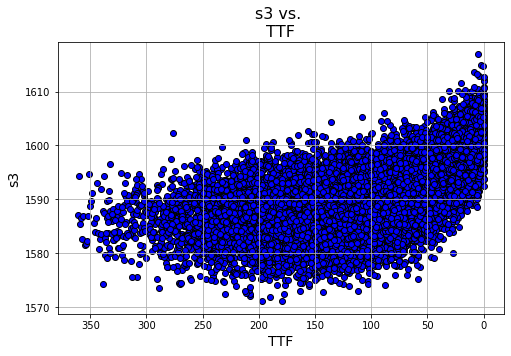

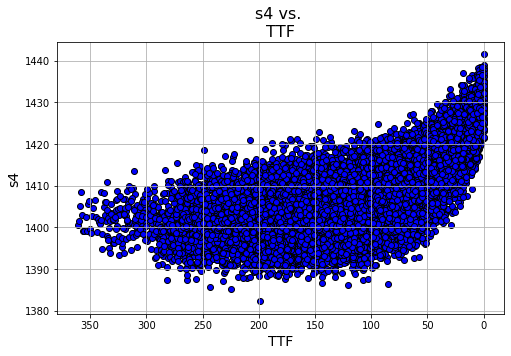

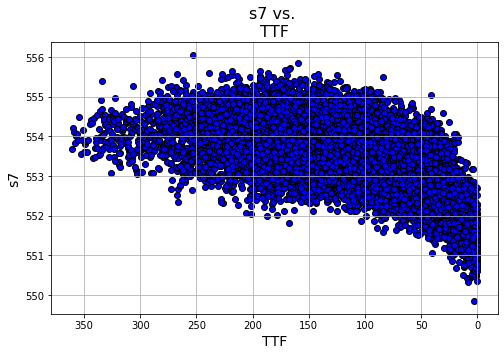

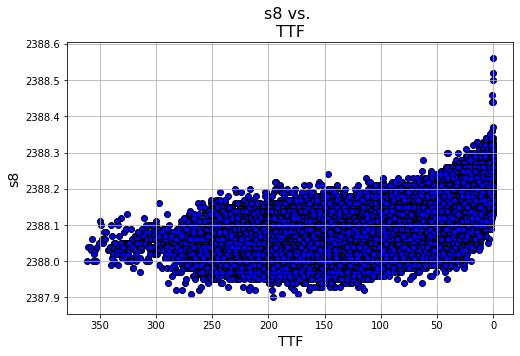

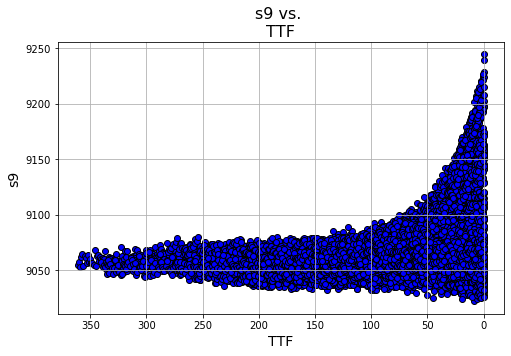

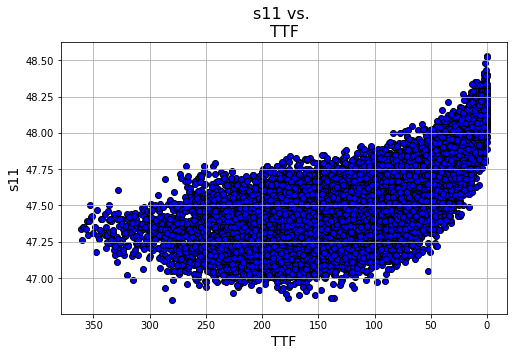

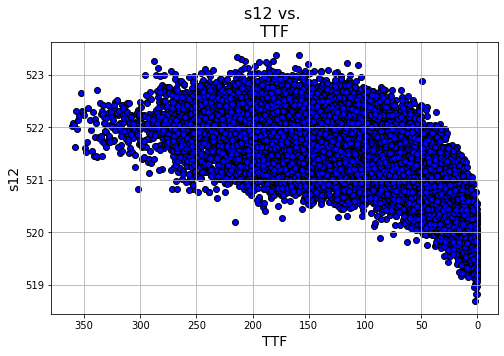

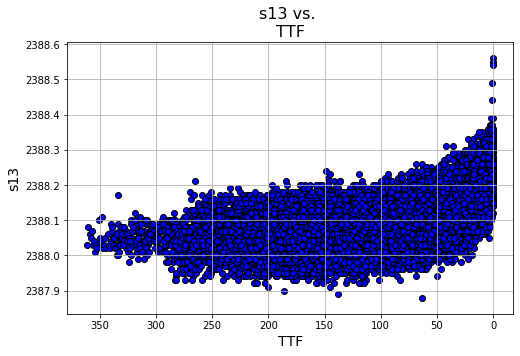

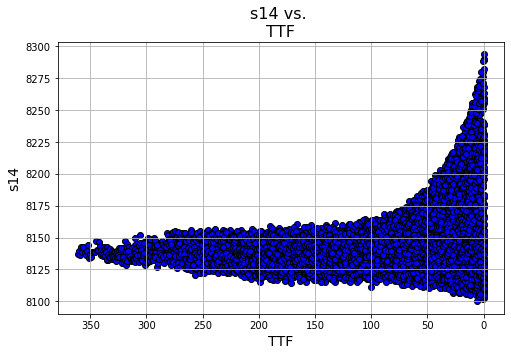

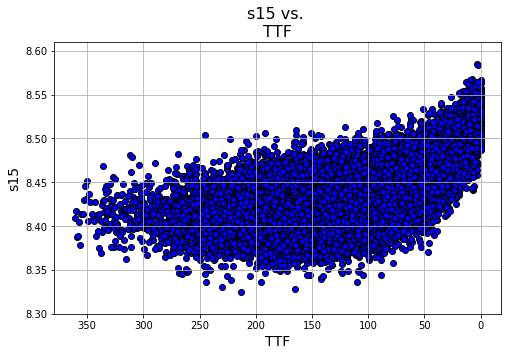

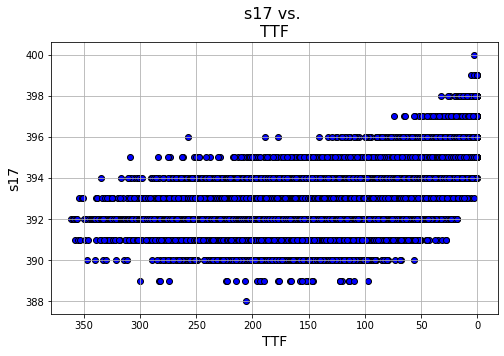

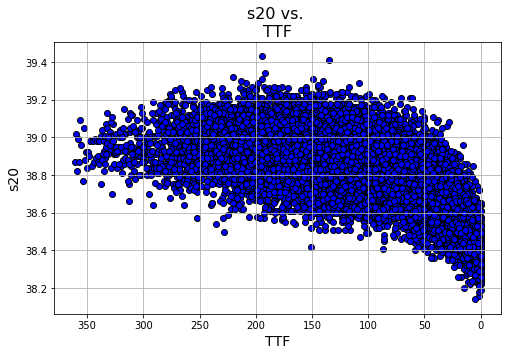

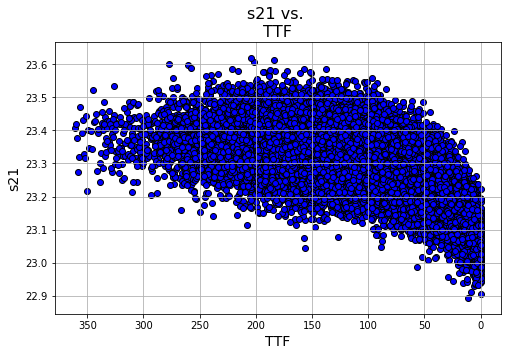

In [401]:
for c in df.columns[1:-1]:
    plt.figure(figsize=(8,5))
    plt.title("{} vs. \nTTF".format(c),fontsize=16)
    plt.scatter(x=df['ttf'], y = df[c],color='blue',edgecolor='k')
    plt.grid(True)
    plt.gca().invert_xaxis()
    plt.xlabel('TTF',fontsize=14)
    plt.ylabel(c,fontsize=14)
    plt.show()

In [0]:
df.drop(['setting1', 'setting2', 'setting3'], axis=1,inplace=True)

# Linear Regression Stats

In [403]:
df_train = df[(df['id']>=1) & (df['id']<=80)].reset_index().drop(['id','timestamp'], 1)
df_train

,cycle,s2,s3,s4,s7,s8,s9,s11,s12,s13,s14,s15,s17,s20,s21,ttf
0,1,641.82,1589.70,1400.60,554.36,2388.06,9046.19,47.47,521.66,2388.02,8138.62,8.4195,392,39.06,23.4190,191
1,2,642.15,1591.82,1403.14,553.75,2388.04,9044.07,47.49,522.28,2388.07,8131.49,8.4318,392,39.00,23.4236,190
2,3,642.35,1587.99,1404.20,554.26,2388.08,9052.94,47.27,522.42,2388.03,8133.23,8.4178,390,38.95,23.3442,189
3,4,642.35,1582.79,1401.87,554.45,2388.11,9049.48,47.13,522.86,2388.08,8133.83,8.3682,392,38.88,23.3739,188
4,5,642.37,1582.85,1406.22,554.00,2388.06,9055.15,47.28,522.19,2388.04,8133.80,8.4294,393,38.90,23.4044,187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16133,181,644.00,1604.26,1428.92,552.24,2388.20,9145.62,48.17,520.44,2388.17,8218.63,8.5194,397,38.39,23.1678,4
16134,182,643.81,1598.32,1426.31,551.60,2388.16,9160.23,48.41,520.06,2388.12,8221.91,8.5493,396,38.34,23.0142,3
16135,183,643.49,1603.37,1434.30,551.78,2388.12,9152.84,48.04,519.67,2388.21,8217.46,8.5106,397,38.34,22.9337,2
16136,184,643.83,1603.01,1430.23,551.78,2388.17,9164.10,48.04,519.72,2388.20,8228.65,8.4983,397,38.53,22.9971,1


In [404]:
df_test = df[(df['id']>=81) & (df['id']<=100)].drop('id', 1)
df_test

,cycle,s2,s3,s4,s7,s8,s9,s11,s12,s13,s14,s15,s17,s20,s21,ttf
timestamp,,,,,,,,,,,,,,,,
2019-01-06 14:29:00,1,642.04,1589.91,1406.63,553.78,2388.10,9060.49,47.53,522.09,2388.04,8134.78,8.4455,391,38.87,23.3365,239
2019-01-06 14:29:30,2,642.65,1586.25,1407.88,553.70,2388.09,9064.32,47.39,522.07,2388.07,8140.37,8.4573,392,38.91,23.3452,238
2019-01-06 14:30:00,3,642.55,1586.42,1396.40,553.28,2388.11,9058.66,47.39,521.07,2388.06,8139.75,8.4522,394,39.04,23.3610,237
2019-01-06 14:30:30,4,642.41,1594.89,1404.86,554.25,2388.04,9056.54,47.59,521.68,2388.04,8144.12,8.4403,392,38.77,23.4206,236
2019-01-06 14:31:00,5,643.41,1590.49,1409.58,553.50,2388.04,9058.47,47.24,521.47,2388.12,8139.21,8.3971,392,39.04,23.3311,235
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-08 03:53:00,196,643.49,1597.98,1428.63,551.43,2388.19,9065.52,48.07,519.49,2388.26,8137.60,8.4956,397,38.49,22.9735,4
2019-01-08 03:53:30,197,643.54,1604.50,1433.58,550.86,2388.23,9065.11,48.04,519.68,2388.22,8136.50,8.5139,395,38.30,23.1594,3
2019-01-08 03:54:00,198,643.42,1602.46,1428.18,550.94,2388.24,9065.90,48.09,520.01,2388.24,8141.05,8.5646,398,38.44,22.9333,2


In [0]:
X_train = df_train.drop('ttf', 1)
y_train = df_train['ttf']
X_test = df_test.drop('ttf', 1)
y_test = df_test['ttf']

# Scikit Learn

In [406]:
clf = LinearRegression()
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.5297018191117046

leverage regression diagnostics
cooks distance
tukey table

In [0]:
import statsmodels.api as sm

In [408]:
X = sm.add_constant(X_train)
est = sm.OLS(y_train, X).fit()
est.summary()

/home/sachin/.local/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    ttf   R-squared:                       0.692
Model:                            OLS   Adj. R-squared:                  0.691
Method:                 Least Squares   F-statistic:                     2411.
Date:                Sun, 27 Oct 2019   Prob (F-statistic):               0.00
Time:                        12:35:47   Log-Likelihood:                -80996.
No. Observations:               16138   AIC:                         1.620e+05
Df Residuals:                   16122   BIC:                         1.621e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.235e+05   2.59e+04      4.768      0.000    7.28e+04    1.74e+05
cycle         -0.4579      0.006    -71.726      0.000      -0.470      -0.445
s2            -5.2285      0.940     -5.564      0.000      -7.071      -3.386
s3            -0.1969      0.071     -2.760      0.006      -0.337      -0.057
s4            -0.4005      0.069     -5.818      0.000      -0.535      -0.266
s7             3.2295      0.675      4.784      0.000       1.906       4.553
s8           -28.2759      8.803     -3.212      0.001     -45.531     -11.021
s9            -0.1130      0.055     -2.041      0.041      -0.222      -0.004
s11          -20.9225      2.657     -7.874      0.000     -26.131     -15.714
s12            5.3897      0.899      5.995      0.000       3.628       7.152
s13          -22.3301      8.633     -2.587      0.010     -39.251      -5.409
s14           -0.1209      0.063     -1.920      0.055      -0.244       0.003
s15          -62.7740     13.942     -4.502      0.000     -90.102     -35.446
s17           -0.8231      0.299     -2.755      0.006      -1.409      -0.238
s20            9.7744      2.794      3.499      0.000       4.298      15.250
s21           25.1325      4.706      5.340      0.000      15.908      34.357
==============================================================================
Omnibus:                     3326.870   Durbin-Watson:                   0.044
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7719.000
Skew:                           1.166   Prob(JB):                         0.00
Kurtosis:                       5.458   Cond. No.                     1.16e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.16e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [409]:
est.rsquared

0.6916911897872939

# Correlation Matrix

In [0]:
from statsmodels.graphics.correlation import plot_corr

In [411]:
corr = df.drop('id', 1).corr()
corr

,cycle,s2,s3,s4,s7,s8,s9,s11,s12,s13,s14,s15,s17,s20,s21,ttf
cycle,1.000000,0.549898,0.543947,0.624577,-0.595914,0.475977,0.443999,0.634385,-0.611354,0.477523,0.370324,0.588676,0.566995,-0.583597,-0.585923,-0.736241
s2,0.549898,1.000000,0.602610,0.714949,-0.702136,0.662325,0.273764,0.740020,-0.724578,0.661792,0.179752,0.675975,0.629886,-0.661841,-0.668050,-0.606484
s3,0.543947,0.602610,1.000000,0.678413,-0.664595,0.602481,0.322964,0.695900,-0.680307,0.600963,0.237137,0.639921,0.600017,-0.625941,-0.633901,-0.584520
s4,0.624577,0.714949,0.678413,1.000000,-0.793130,0.746852,0.297429,0.830136,-0.815591,0.745158,0.190748,0.758459,0.703499,-0.748067,-0.745193,-0.678948
s7,-0.595914,-0.702136,-0.664595,-0.793130,1.000000,-0.767132,-0.217835,-0.822805,0.812713,-0.764611,-0.110053,-0.747051,-0.692893,0.736163,0.737447,0.657223
s8,0.475977,0.662325,0.602481,0.746852,-0.767132,1.000000,-0.032091,0.782213,-0.786540,0.826084,-0.144787,0.700949,0.627785,-0.687030,-0.688840,-0.563968
s9,0.443999,0.273764,0.322964,0.297429,-0.217835,-0.032091,1.000000,0.274591,-0.210238,-0.034763,0.963157,0.293753,0.337110,-0.285280,-0.292795,-0.390102
s11,0.634385,0.740020,0.695900,0.830136,-0.822805,0.782213,0.274591,1.000000,-0.846884,0.780761,0.163408,0.780913,0.722296,-0.771510,-0.772554,-0.696228
s12,-0.611354,-0.724578,-0.680307,-0.815591,0.812713,-0.786540,-0.210238,-0.846884,1.000000,-0.788441,-0.098141,-0.766052,-0.703485,0.751943,0.756263,0.671983
s13,0.477523,0.661792,0.600963,0.745158,-0.764611,0.826084,-0.034763,0.780761,-0.788441,1.000000,-0.147036,0.697662,0.627410,-0.686172,-0.688948,-0.562569


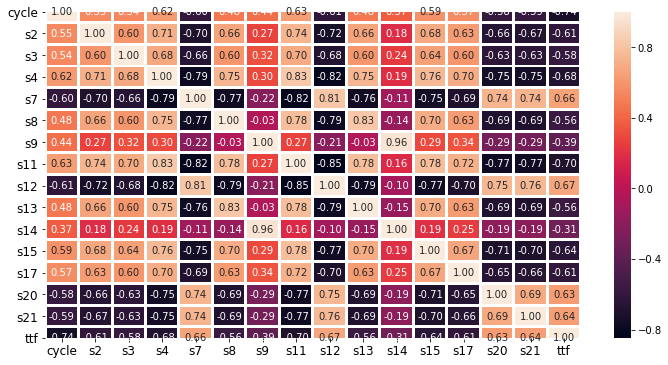

In [412]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.heatmap(corr, annot=True, fmt='0.2f', linewidths=2)
plt.xticks(size=12)
plt.yticks(size=12)
plt.show()

s9 and s14 are highly correlated

In [0]:
df.drop('s14',1,inplace=True)

In [0]:
def set_train_test_data():
  global df_train
  df_train =  df[(df['id']>=1) & (df['id']<=80)].reset_index().drop(['id','timestamp'], 1)
  global df_test 
  df_test = df[(df['id']>=81) & (df['id']<=100)].drop('id', 1)
  global X_train
  X_train = df_train.drop('ttf', 1)
  global y_train
  y_train = df_train['ttf']
  global X_test
  X_test = df_test.drop('ttf', 1)
  global y_test
  y_test = df_test['ttf']

In [0]:
def run_model_stats():
  global X
  X = sm.add_constant(X_train)
  global est
  est = sm.OLS(y_train, X).fit()
  return est.summary()

In [416]:
set_train_test_data()
run_model_stats()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    ttf   R-squared:                       0.692
Model:                            OLS   Adj. R-squared:                  0.691
Method:                 Least Squares   F-statistic:                     2583.
Date:                Sun, 27 Oct 2019   Prob (F-statistic):               0.00
Time:                        12:35:49   Log-Likelihood:                -80998.
No. Observations:               16138   AIC:                         1.620e+05
Df Residuals:                   16123   BIC:                         1.621e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.154e+05   2.56e+04      4.514      0.000    6.53e+04    1.65e+05
cycle         -0.4584      0.006    -71.866      0.000      -0.471      -0.446
s2            -5.2440      0.940     -5.580      0.000      -7.086      -3.402
s3            -0.1997      0.071     -2.799      0.005      -0.340      -0.060
s4            -0.4013      0.069     -5.828      0.000      -0.536      -0.266
s7             3.2061      0.675      4.750      0.000       1.883       4.529
s8           -26.5338      8.757     -3.030      0.002     -43.698      -9.370
s9            -0.2133      0.018    -11.651      0.000      -0.249      -0.177
s11          -20.8186      2.657     -7.836      0.000     -26.026     -15.611
s12            5.3111      0.898      5.913      0.000       3.551       7.072
s13          -20.6581      8.589     -2.405      0.016     -37.494      -3.822
s15          -62.8107     13.943     -4.505      0.000     -90.141     -35.481
s17           -0.8374      0.299     -2.804      0.005      -1.423      -0.252
s20            9.8062      2.794      3.510      0.000       4.330      15.282
s21           24.9969      4.706      5.311      0.000      15.772      34.222
==============================================================================
Omnibus:                     3330.700   Durbin-Watson:                   0.045
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7736.935
Skew:                           1.167   Prob(JB):                         0.00
Kurtosis:                       5.462   Cond. No.                     8.83e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.83e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [417]:
df_result = pd.DataFrame()
df_result['pvalues'] = est.pvalues[1:]
df_result

,pvalues
cycle,0.000000e+00
s2,2.448097e-08
s3,5.124971e-03
s4,5.704651e-09
s7,2.052181e-06
s8,2.448538e-03
s9,3.022476e-31
s11,4.951130e-15
s12,3.416816e-09
s13,1.617993e-02


In [0]:
df_result['Features'] = X.columns[:-1]

In [0]:
df_result.set_index('Features',inplace=True)

In [0]:
def yes_no(b):
    if b<0.05: # 95% CI
        return 'Yes'
    else:
        return 'No'

In [421]:
df_result['Statistically significant?']= df_result['pvalues'].apply(yes_no)
df_result

,pvalues,Statistically significant?
Features,,
const,0.000000e+00,Yes
cycle,2.448097e-08,Yes
s2,5.124971e-03,Yes
s3,5.704651e-09,Yes
s4,2.052181e-06,Yes
s7,2.448538e-03,Yes
s8,3.022476e-31,Yes
s9,4.951130e-15,Yes
s11,3.416816e-09,Yes


# Residual Plots

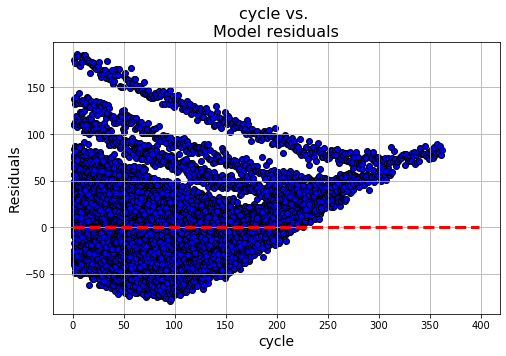

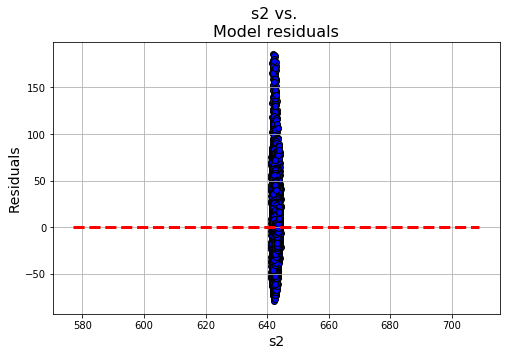

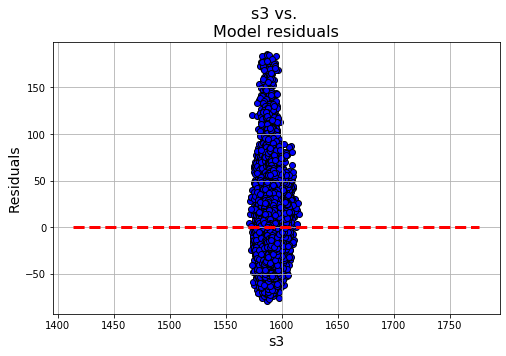

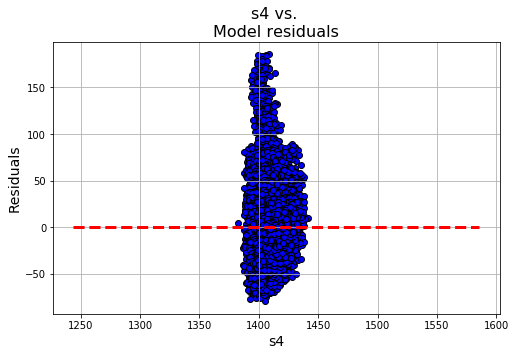

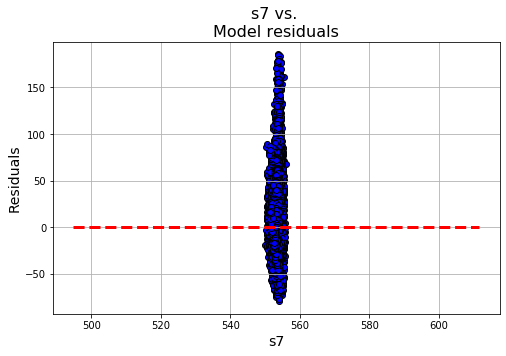

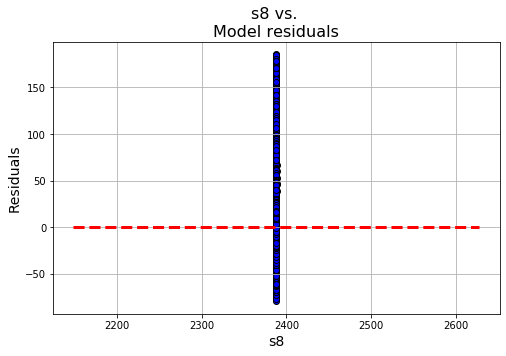

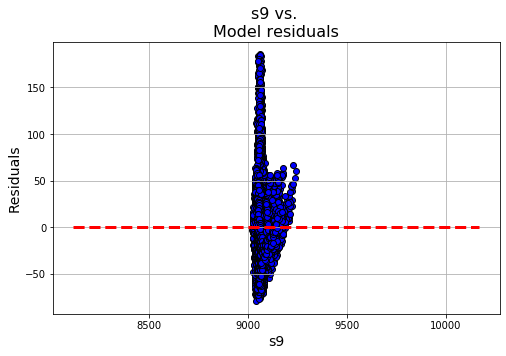

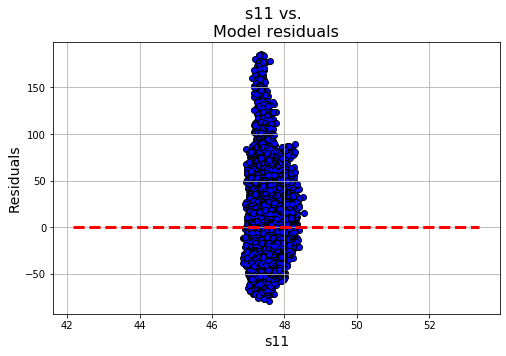

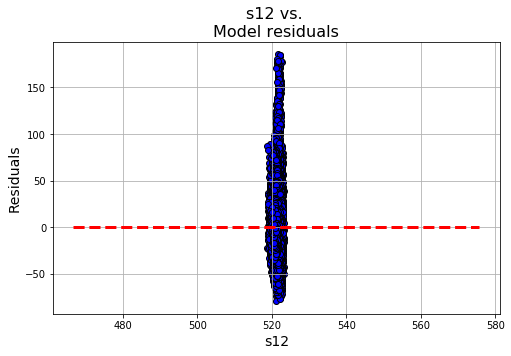

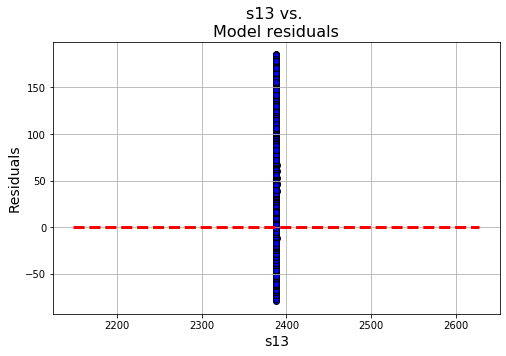

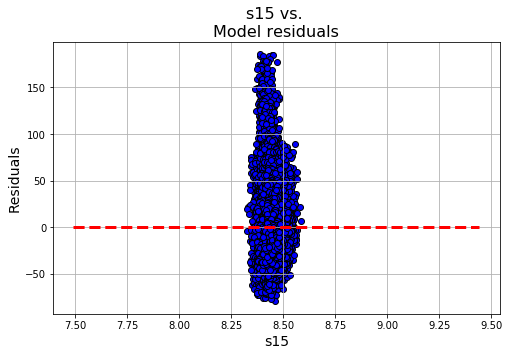

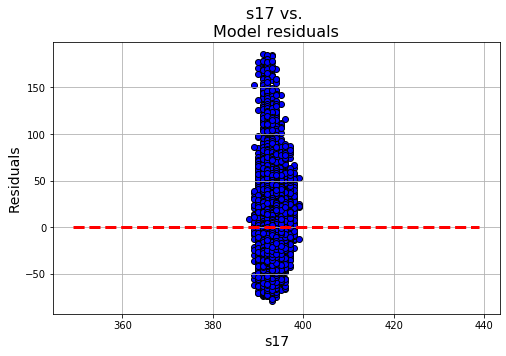

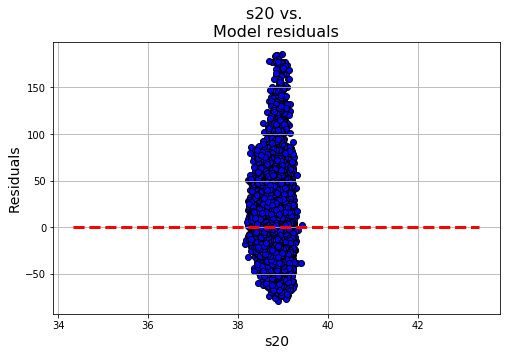

In [422]:
for c in X_train.columns[:-1]:
    plt.figure(figsize=(8,5))
    plt.title("{} vs. \nModel residuals".format(c),fontsize=16)
    plt.scatter(x=X_train[c],y=est.resid,color='blue',edgecolor='k')
    plt.grid(True)
    xmin=min(X_train[c])
    xmax = max(X_train[c])
    plt.hlines(y=0,xmin=xmin*0.9,xmax=xmax*1.1,color='red',linestyle='--',lw=3)
    plt.xlabel(c,fontsize=14)
    plt.ylabel('Residuals',fontsize=14)
    plt.show()

# Fitted Vs Residuals

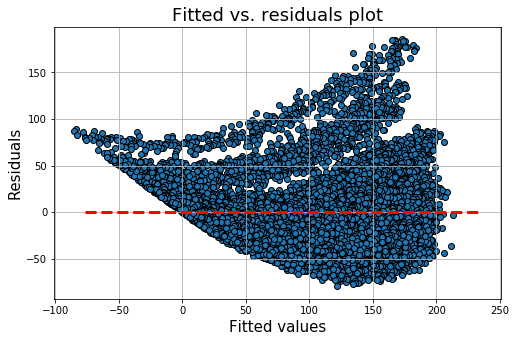

In [423]:
plt.figure(figsize=(8,5))
p= plt.scatter(x=est.fittedvalues,y=est.resid,edgecolor='k')
xmin = min(est.fittedvalues)
xmax = max(est.fittedvalues)
plt.hlines(y=0,xmin=xmin*0.9,xmax=xmax*1.1,color='red',linestyle='--',lw=3)
plt.xlabel("Fitted values",fontsize=15)
plt.ylabel("Residuals",fontsize=15)
plt.title("Fitted vs. residuals plot",fontsize=18)
plt.grid(True)
plt.show()

# Histogram of Residuals

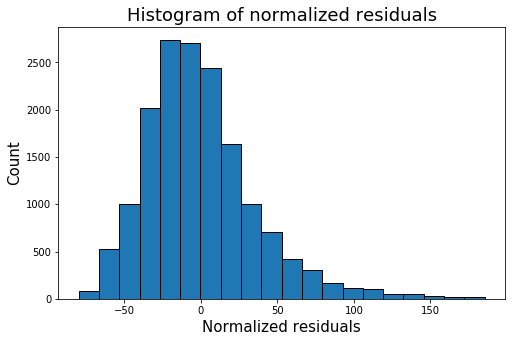

In [424]:
plt.figure(figsize=(8,5))
plt.hist(est.resid,bins=20,edgecolor='k')
plt.ylabel('Count',fontsize=15)
plt.xlabel('Normalized residuals',fontsize=15)
plt.title("Histogram of normalized residuals",fontsize=18)
plt.show()

# QQ Plot

In [0]:
from statsmodels.graphics.gofplots import qqplot

<Figure size 576x360 with 0 Axes>

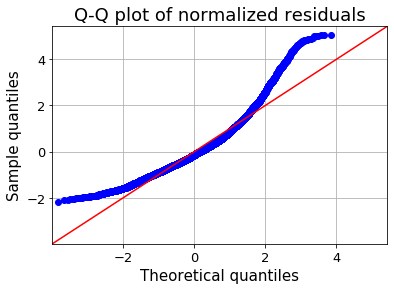

In [426]:
plt.figure(figsize=(8,5))
fig = qqplot(est.resid,line='45',fit='True')
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel("Theoretical quantiles",fontsize=15)
plt.ylabel("Sample quantiles",fontsize=15)
plt.title("Q-Q plot of normalized residuals",fontsize=18)
plt.grid(True)
plt.show()

# Shapiro-Wilk Test

In [0]:
from scipy.stats import shapiro

In [428]:
s,p = shapiro(est.resid)
s,p

/home/sachin/.local/lib/python3.6/site-packages/scipy/stats/morestats.py:1660: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


(0.9370221495628357, 0.0)

# Cook's Distance

In [0]:
from statsmodels.stats.outliers_influence import OLSInfluence
inf = OLSInfluence(est)

In [430]:
threshold = 4/(len(df))
(c, p) = inf.cooks_distance
outliers = pd.Series(c).sort_values(ascending=False)
outliers = outliers[outliers > threshold]
outliers

9495     0.004815
10121    0.004600
1913     0.003344
10120    0.002033
13639    0.001996
           ...   
13230    0.000195
5916     0.000195
12751    0.000195
11452    0.000194
1114     0.000194
Length: 1025, dtype: float64

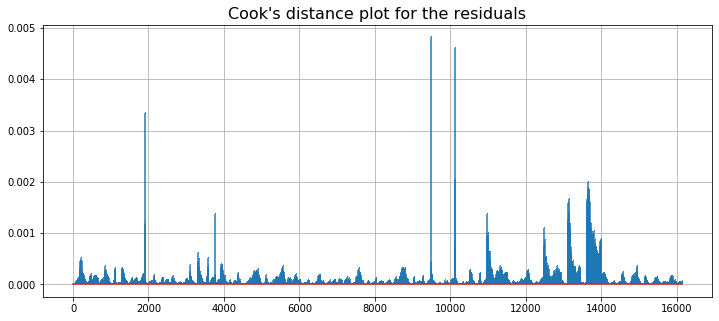

In [431]:
plt.figure(figsize=(12,5))
plt.title("Cook's distance plot for the residuals",fontsize=16)
plt.stem(np.arange(len(c)), c, markerfmt=",", use_line_collection=True)
plt.grid(True)
plt.show()

# Variance Inflation Factor (VIF)

In [432]:
vif = []
for c in df.columns[:-1]:
    X = df.drop(['ttf'] + [c], axis=1)
    y = df[c]
    X = sm.add_constant(X)
    est = sm.OLS(y, X).fit()
    r2 = est.rsquared
    vif.append((c, 1/(1-r2)))
vif

[('id', 1.0175718310186992),
 ('cycle', 2.124516524897005),
 ('s2', 2.6403369280559197),
 ('s3', 2.290911029389333),
 ('s4', 4.600460842343981),
 ('s7', 4.343049545195621),
 ('s8', 4.660292978031609),
 ('s9', 2.061848527866781),
 ('s11', 6.030566455645505),
 ('s12', 5.292175423948102),
 ('s13', 4.651235468307926),
 ('s15', 3.303358005890679),
 ('s17', 2.563730387787209),
 ('s20', 3.0702108496300546),
 ('s21', 3.116956144308834)]

In [0]:
df_train.drop(outliers.index, inplace=True)
X_train = df_train.drop('ttf', 1)
y_train = df_train['ttf']
X_test = df_test.drop('ttf', 1)
y_test = df_test['ttf']

In [434]:
run_model_stats()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    ttf   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                     3895.
Date:                Sun, 27 Oct 2019   Prob (F-statistic):               0.00
Time:                        12:35:58   Log-Likelihood:                -71764.
No. Observations:               15113   AIC:                         1.436e+05
Df Residuals:                   15098   BIC:                         1.437e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.544e+05   2.13e+04      7.256      0.000    1.13e+05    1.96e+05
cycle         -0.4953      0.005    -92.021      0.000      -0.506      -0.485
s2            -4.3502      0.747     -5.823      0.000      -5.815      -2.886
s3            -0.2221      0.057     -3.927      0.000      -0.333      -0.111
s4            -0.3367      0.055     -6.156      0.000      -0.444      -0.230
s7             3.3460      0.537      6.232      0.000       2.294       4.398
s8           -29.2109      7.071     -4.131      0.000     -43.071     -15.351
s9            -0.1914      0.015    -12.568      0.000      -0.221      -0.162
s11          -19.0387      2.110     -9.022      0.000     -23.175     -14.902
s12            4.6330      0.715      6.483      0.000       3.232       6.034
s13          -34.5553      6.933     -4.985      0.000     -48.144     -20.967
s15          -47.5756     11.097     -4.287      0.000     -69.327     -25.825
s17           -0.6648      0.237     -2.804      0.005      -1.130      -0.200
s20            8.0087      2.218      3.611      0.000       3.661      12.356
s21           14.4541      3.730      3.875      0.000       7.143      21.766
==============================================================================
Omnibus:                      318.249   Durbin-Watson:                   0.059
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              335.676
Skew:                           0.359   Prob(JB):                     1.28e-73
Kurtosis:                       2.871   Cond. No.                     9.33e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.33e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [435]:
clf = LinearRegression()
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.47944272245565217

In [436]:
df_full = df.drop(['id'],1).reset_index()
df_full = df_full.drop(axis=0, index=outliers.index)
df_full

,timestamp,cycle,s2,s3,s4,s7,s8,s9,s11,s12,s13,s15,s17,s20,s21,ttf
0,2019-01-01 00:00:00,1,641.82,1589.70,1400.60,554.36,2388.06,9046.19,47.47,521.66,2388.02,8.4195,392,39.06,23.4190,191
1,2019-01-01 00:00:30,2,642.15,1591.82,1403.14,553.75,2388.04,9044.07,47.49,522.28,2388.07,8.4318,392,39.00,23.4236,190
2,2019-01-01 00:01:00,3,642.35,1587.99,1404.20,554.26,2388.08,9052.94,47.27,522.42,2388.03,8.4178,390,38.95,23.3442,189
3,2019-01-01 00:01:30,4,642.35,1582.79,1401.87,554.45,2388.11,9049.48,47.13,522.86,2388.08,8.3682,392,38.88,23.3739,188
4,2019-01-01 00:02:00,5,642.37,1582.85,1406.22,554.00,2388.06,9055.15,47.28,522.19,2388.04,8.4294,393,38.90,23.4044,187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,2019-01-08 03:53:00,196,643.49,1597.98,1428.63,551.43,2388.19,9065.52,48.07,519.49,2388.26,8.4956,397,38.49,22.9735,4
20627,2019-01-08 03:53:30,197,643.54,1604.50,1433.58,550.86,2388.23,9065.11,48.04,519.68,2388.22,8.5139,395,38.30,23.1594,3
20628,2019-01-08 03:54:00,198,643.42,1602.46,1428.18,550.94,2388.24,9065.90,48.09,520.01,2388.24,8.5646,398,38.44,22.9333,2
20629,2019-01-08 03:54:30,199,643.23,1605.26,1426.53,550.68,2388.25,9073.72,48.39,519.67,2388.23,8.5389,395,38.29,23.0640,1


In [0]:
X = df_full.drop(['timestamp','ttf'], axis = 1)
y = df_full['ttf']

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [439]:
clf = LinearRegression()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.7023335666307104

In [440]:
X = sm.add_constant(X_train)
est = sm.OLS(y_train, X).fit()
est.summary()

/home/sachin/.local/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    ttf   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.699
Method:                 Least Squares   F-statistic:                     2608.
Date:                Sun, 27 Oct 2019   Prob (F-statistic):               0.00
Time:                        12:35:59   Log-Likelihood:                -78266.
No. Observations:               15684   AIC:                         1.566e+05
Df Residuals:                   15669   BIC:                         1.567e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.405e+05   2.67e+04      5.264      0.000    8.82e+04    1.93e+05
cycle         -0.4092      0.006    -65.778      0.000      -0.421      -0.397
s2            -5.4044      0.928     -5.821      0.000      -7.224      -3.584
s3            -0.2659      0.070     -3.786      0.000      -0.404      -0.128
s4            -0.3980      0.068     -5.839      0.000      -0.532      -0.264
s7             4.1207      0.676      6.096      0.000       2.796       5.446
s8           -29.6695      8.787     -3.377      0.001     -46.892     -12.447
s9            -0.2791      0.019    -14.602      0.000      -0.317      -0.242
s11          -22.2265      2.627     -8.462      0.000     -27.375     -17.078
s12            5.4287      0.892      6.088      0.000       3.681       7.177
s13          -27.7949      8.668     -3.207      0.001     -44.785     -10.805
s15          -76.6683     13.865     -5.529      0.000    -103.846     -49.491
s17           -0.8164      0.296     -2.759      0.006      -1.396      -0.236
s20            9.4741      2.771      3.420      0.001       4.044      14.905
s21           16.3803      4.640      3.530      0.000       7.285      25.476
==============================================================================
Omnibus:                     2090.158   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3511.974
Skew:                           0.904   Prob(JB):                         0.00
Kurtosis:                       4.450   Cond. No.                     9.36e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.36e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [441]:
X_train.corr()

,cycle,s2,s3,s4,s7,s8,s9,s11,s12,s13,s15,s17,s20,s21
cycle,1.000000,0.549344,0.546784,0.625828,-0.596634,0.471644,0.457629,0.636194,-0.611046,0.469409,0.589961,0.572535,-0.585912,-0.586386
s2,0.549344,1.000000,0.604755,0.719138,-0.704912,0.667328,0.266142,0.740985,-0.728188,0.663968,0.678076,0.632291,-0.663619,-0.669299
s3,0.546784,0.604755,1.000000,0.678388,-0.667522,0.603894,0.319832,0.696942,-0.681780,0.600819,0.639680,0.602309,-0.628177,-0.632059
s4,0.625828,0.719138,0.678388,1.000000,-0.796298,0.748203,0.292263,0.830974,-0.816841,0.747160,0.761033,0.706418,-0.748599,-0.745994
s7,-0.596634,-0.704912,-0.667522,-0.796298,1.000000,-0.772762,-0.213068,-0.824689,0.815007,-0.767779,-0.748783,-0.697990,0.739048,0.737145
s8,0.471644,0.667328,0.603894,0.748203,-0.772762,1.000000,-0.048626,0.784327,-0.789747,0.824959,0.705607,0.628907,-0.691940,-0.689301
s9,0.457629,0.266142,0.319832,0.292263,-0.213068,-0.048626,1.000000,0.270848,-0.202696,-0.054397,0.289898,0.329744,-0.283400,-0.287027
s11,0.636194,0.740985,0.696942,0.830974,-0.824689,0.784327,0.270848,1.000000,-0.847603,0.782295,0.782889,0.727473,-0.773573,-0.773206
s12,-0.611046,-0.728188,-0.681780,-0.816841,0.815007,-0.789747,-0.202696,-0.847603,1.000000,-0.790898,-0.767936,-0.706727,0.752408,0.756952
s13,0.469409,0.663968,0.600819,0.747160,-0.767779,0.824959,-0.054397,0.782295,-0.790898,1.000000,0.700330,0.628099,-0.687298,-0.689996


In [0]:
X_train.drop('s11',1, inplace=True)
X_test.drop('s11',1, inplace=True)

In [443]:
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.70026303989899

In [0]:
X_train.drop(['s15', 's8'],1, inplace=True)
X_test.drop(['s15', 's8'],1, inplace=True)

In [445]:
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.6995918809745268

In [0]:
def ols_stats(X, y):
  X_model = sm.add_constant(X)
  est = sm.OLS(y, X_model).fit()
  return est.summary()

In [447]:
ols_stats(pd.concat([X_train, X_test]), pd.concat([y_train, y_test]))

/home/sachin/.local/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    ttf   R-squared:                       0.698
Model:                            OLS   Adj. R-squared:                  0.697
Method:                 Least Squares   F-statistic:                     4108.
Date:                Sun, 27 Oct 2019   Prob (F-statistic):               0.00
Time:                        12:35:59   Log-Likelihood:                -97926.
No. Observations:               19606   AIC:                         1.959e+05
Df Residuals:                   19594   BIC:                         1.960e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.267e+05    1.8e+04      7.031      0.000    9.14e+04    1.62e+05
cycle         -0.4133      0.006    -74.240      0.000      -0.424      -0.402
s2            -6.3711      0.826     -7.717      0.000      -7.989      -4.753
s3            -0.3845      0.063     -6.113      0.000      -0.508      -0.261
s4            -0.5849      0.060     -9.799      0.000      -0.702      -0.468
s7             6.0351      0.590     10.220      0.000       4.878       7.192
s9            -0.2809      0.016    -17.747      0.000      -0.312      -0.250
s12            7.9490      0.775     10.252      0.000       6.429       9.469
s13          -52.9924      7.474     -7.090      0.000     -67.643     -38.342
s17           -1.3258      0.263     -5.040      0.000      -1.841      -0.810
s20           14.2262      2.451      5.804      0.000       9.422      19.031
s21           25.4969      4.128      6.176      0.000      17.405      33.588
==============================================================================
Omnibus:                     2574.863   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4262.662
Skew:                           0.901   Prob(JB):                         0.00
Kurtosis:                       4.405   Cond. No.                     6.83e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.83e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Polynomial Regression

In [0]:
from sklearn.preprocessing import PolynomialFeatures

In [0]:
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)

In [0]:
clf.fit(X_train_poly, y_train)
clf.score(X_test_poly, y_test)
pickle.dump(clf, open(f'{pickle_path}/poly_regression.pickle', 'wb'))

# Decision Tree Regression

In [0]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz  

In [0]:
regressor = DecisionTreeRegressor(random_state = 0)  
regressor.fit(X_train, y_train)
regressor.score(X_test, y_test)
pickle.dump(regressor, open(f'{pickle_path}/decision_tree_regression.pickle', 'wb'))

In [0]:
export_graphviz(regressor, out_file ='decision_tree.txt', 
               feature_names = X_train.columns) 

# Random Forest Regression

In [0]:
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler

In [455]:
X = df_full.drop(['timestamp','ttf'], axis = 1)
y = df_full['ttf']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
regressor = RandomForestRegressor(max_depth=6,n_estimators = 100, random_state = 0, n_jobs=-1)  
regressor.fit(X_train, y_train) 
pickle.dump(regressor, open(f'{pickle_path}/random_forest_regression.pickle', 'wb'))
regressor.score(X_test, y_test)

0.7509794651592964

In [456]:
gsc = GridSearchCV(
        estimator=RandomForestRegressor(),
        param_grid={
            'max_depth': range(5,7),
            'n_estimators': (50, 100),
        },
        cv=5, scoring='neg_mean_squared_error', verbose=100,n_jobs=-1)
    
grid_result = gsc.fit(X_train, y_train)
best_params = grid_result.best_params_
print('Best Params',best_params)
rfr = RandomForestRegressor(max_depth=best_params["max_depth"], n_estimators=best_params["n_estimators"], random_state=False, verbose=False)
scores = cross_val_score(rfr, X, y, cv=10, scoring='neg_mean_squared_error', n_jobs=-1)
rsquares = cross_val_score(rfr, X, y, cv=10, n_jobs=-1)
pickle.dump(regressor, open(f'{pickle_path}/random_forest_regression_cv.pickle', 'wb'))


print('Average error: ', -scores.mean())
print('Average RSquare: ', rsquares.mean())

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
Pickling array (shape=(14,), dtype=object).
Pickling array (shape=(15684,), dtype=int64).
Pickling array (shape=(2, 15684), dtype=int64).
Memmapping (shape=(12, 15684), dtype=float64) to new file /dev/shm/joblib_memmapping_folder_8586_7440808630/8586-140625034108712-ee722de4dd1045e494c73546c5812f02.pkl
Pickling array (shape=(2,), dtype=object).
Pickling array (shape=(12,), dtype=object).
Pickling array (shape=(12,), dtype=int64).
Pickling array (shape=(15684,), dtype=int64).
Pickling array (shape=(15684,), dtype=int64).
Pickling array (shape=(15684,), dtype=int64).
Pickling array (shape=(12547,), dtype=int64).
Pickling array (shape=(3137,), dtype=int64).
Pickling array (shape=(14,), dtype=object).
Pickling array (shape=(15684,), dtype=int64).
Pickling array (shape=(2, 15684), dtype=int64).
Memmapping (shape=(12, 15684), dtype=float64) to old file /dev/

# Gradient Boosting Regression

In [0]:
from sklearn.ensemble import GradientBoostingRegressor

In [0]:
X = df_full.drop(['timestamp','ttf'], axis = 1)
y = df_full['ttf']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
regressor = GradientBoostingRegressor(learning_rate=0.1, max_depth=7, random_state=0, loss='ls')
regressor.fit(X_train, y_train)
regressor.score(X_test, y_test)
pickle.dump(regressor, open(f'{pickle_path}/gradient_boosting_regressor.pickle', 'wb'))

In [459]:
gsc = GridSearchCV(
        estimator=GradientBoostingRegressor(),
        param_grid={
            'max_depth': range(5,7),
            'n_estimators': (50, 100),
        },
        cv=5, scoring='neg_mean_squared_error', verbose=100,n_jobs=-1)
    
grid_result = gsc.fit(X_train, y_train)
best_params = grid_result.best_params_
print('Best Params',best_params)
rfr = GradientBoostingRegressor(max_depth=best_params["max_depth"], n_estimators=best_params["n_estimators"], random_state=False, verbose=False)
scores = cross_val_score(rfr, X, y, cv=10, scoring='neg_mean_absolute_error', n_jobs=-1)
print('Average error: ', -scores.mean())

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
Pickling array (shape=(14,), dtype=object).
Pickling array (shape=(15684,), dtype=int64).
Pickling array (shape=(2, 15684), dtype=int64).
Memmapping (shape=(12, 15684), dtype=float64) to new file /dev/shm/joblib_memmapping_folder_8586_301420728/8586-140625034105240-19c472501f4a4d7a80bd3addbbb123b0.pkl
Pickling array (shape=(2,), dtype=object).
Pickling array (shape=(12,), dtype=object).
Pickling array (shape=(12,), dtype=int64).
Pickling array (shape=(15684,), dtype=int64).
Pickling array (shape=(15684,), dtype=int64).
Pickling array (shape=(15684,), dtype=int64).
Pickling array (shape=(12547,), dtype=int64).
Pickling array (shape=(3137,), dtype=int64).
Pickling array (shape=(14,), dtype=object).
Pickling array (shape=(15684,), dtype=int64).
Pickling array (shape=(2, 15684), dtype=int64).
Memmapping (shape=(12, 15684), dtype=float64) to old file /dev/s

# PCA

In [0]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [0]:
X = df_full.drop(['timestamp','ttf'], axis = 1)
y = df_full['ttf']
X_scaled = StandardScaler().fit_transform(X)

In [462]:
pca = PCA()
pca.fit(X_scaled)
pca_data = pca.transform(X_scaled)
pca.explained_variance_ratio_

array([0.67524408, 0.09422964, 0.0304424 , 0.0288142 , 0.02600918,
       0.02420153, 0.02172944, 0.02049937, 0.01728009, 0.01443675,
       0.01261907, 0.01234192, 0.0119512 , 0.01020113])

In [463]:
per_var = np.round(pca.explained_variance_ratio_*100, decimals=2)
labels = ['PC' + str(x) for x in range(1, len(per_var) + 1)]
per_var

array([67.52,  9.42,  3.04,  2.88,  2.6 ,  2.42,  2.17,  2.05,  1.73,
        1.44,  1.26,  1.23,  1.2 ,  1.02])

In [464]:
pca_explained_variance_ratio_total = {}
temp_labels = []
variance_pc = 0
for i,l in enumerate(labels):
  temp_labels.append(l)
  variance_pc += per_var[i]
  pca_explained_variance_ratio_total[','.join(temp_labels)] = variance_pc
pca_explained_variance_ratio_total

{'PC1': 67.52,
 'PC1,PC2': 76.94,
 'PC1,PC2,PC3': 79.98,
 'PC1,PC2,PC3,PC4': 82.86,
 'PC1,PC2,PC3,PC4,PC5': 85.46,
 'PC1,PC2,PC3,PC4,PC5,PC6': 87.88,
 'PC1,PC2,PC3,PC4,PC5,PC6,PC7': 90.05,
 'PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8': 92.1,
 'PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9': 93.83,
 'PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10': 95.27,
 'PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11': 96.53,
 'PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12': 97.76,
 'PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13': 98.96000000000001,
 'PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14': 99.98}

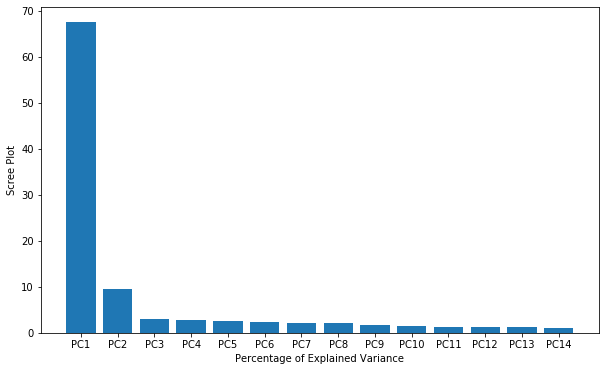

In [465]:
plt.figure(figsize=(10,6))
plt.bar(x=range(1, len(per_var) + 1), height=per_var, tick_label=labels)
plt.xlabel('Percentage of Explained Variance')
plt.ylabel('Scree Plot')
plt.show()

In [466]:
loading_scores = pd.DataFrame(pca.components_, columns=X.columns, index=labels)
loading_scores

,cycle,s2,s3,s4,s7,s8,s9,s11,s12,s13,s15,s17,s20,s21
PC1,0.231207,0.266463,0.253693,0.293862,-0.291379,0.274207,0.099523,0.301806,-0.297352,0.273939,0.280128,0.262584,-0.276124,-0.276794
PC2,0.342838,0.013915,0.106086,0.008153,0.073222,-0.336187,0.786263,-0.025362,0.083511,-0.337732,0.023618,0.103953,-0.022700,-0.028211
PC3,-0.720790,0.071171,0.659255,-0.003148,0.025941,-0.041444,0.171945,-0.012097,0.034628,-0.047095,0.009229,0.063809,0.033060,0.000682
PC4,0.480692,-0.297421,0.653147,-0.034149,0.006154,0.033090,-0.195214,-0.023851,-0.010657,0.040980,-0.102500,-0.436424,0.075134,0.066993
PC5,0.053312,-0.674575,0.085229,-0.028856,-0.034199,0.026211,-0.088937,-0.022240,0.014184,0.027514,-0.019655,0.717539,0.070206,0.051121
PC6,0.243198,0.581031,0.181334,-0.098663,0.071551,0.002822,-0.170767,-0.069151,0.038924,0.011444,-0.236399,0.409815,0.481666,0.253159
PC7,-0.026276,-0.072849,-0.044332,-0.012073,0.002227,0.000213,0.024597,0.008233,-0.018820,0.014072,-0.129963,-0.056594,0.542652,-0.822251
PC8,-0.021243,-0.090534,-0.049306,0.068452,-0.037043,0.039483,0.066710,0.022353,-0.044459,0.016938,0.779020,-0.118261,0.537536,0.253551
PC9,-0.114613,-0.148568,-0.126003,0.413832,-0.440770,0.079321,0.254118,0.192973,-0.207283,0.074393,-0.463440,-0.149316,0.301436,0.314383
PC10,-0.000286,0.045983,0.010658,-0.584417,-0.785576,-0.078952,-0.022296,-0.055769,0.096685,-0.119544,0.062136,-0.011429,-0.026628,-0.030298


In [467]:
loading_scores.drop(['PC11', 'PC12', 'PC13', 'PC14'], 0, inplace=True)
loading_scores = loading_scores.applymap(np.abs)
loading_scores

,cycle,s2,s3,s4,s7,s8,s9,s11,s12,s13,s15,s17,s20,s21
PC1,0.231207,0.266463,0.253693,0.293862,0.291379,0.274207,0.099523,0.301806,0.297352,0.273939,0.280128,0.262584,0.276124,0.276794
PC2,0.342838,0.013915,0.106086,0.008153,0.073222,0.336187,0.786263,0.025362,0.083511,0.337732,0.023618,0.103953,0.022700,0.028211
PC3,0.720790,0.071171,0.659255,0.003148,0.025941,0.041444,0.171945,0.012097,0.034628,0.047095,0.009229,0.063809,0.033060,0.000682
PC4,0.480692,0.297421,0.653147,0.034149,0.006154,0.033090,0.195214,0.023851,0.010657,0.040980,0.102500,0.436424,0.075134,0.066993
PC5,0.053312,0.674575,0.085229,0.028856,0.034199,0.026211,0.088937,0.022240,0.014184,0.027514,0.019655,0.717539,0.070206,0.051121
PC6,0.243198,0.581031,0.181334,0.098663,0.071551,0.002822,0.170767,0.069151,0.038924,0.011444,0.236399,0.409815,0.481666,0.253159
PC7,0.026276,0.072849,0.044332,0.012073,0.002227,0.000213,0.024597,0.008233,0.018820,0.014072,0.129963,0.056594,0.542652,0.822251
PC8,0.021243,0.090534,0.049306,0.068452,0.037043,0.039483,0.066710,0.022353,0.044459,0.016938,0.779020,0.118261,0.537536,0.253551
PC9,0.114613,0.148568,0.126003,0.413832,0.440770,0.079321,0.254118,0.192973,0.207283,0.074393,0.463440,0.149316,0.301436,0.314383
PC10,0.000286,0.045983,0.010658,0.584417,0.785576,0.078952,0.022296,0.055769,0.096685,0.119544,0.062136,0.011429,0.026628,0.030298


In [468]:
loading_scores.loc['PC1'].sort_values(ascending=False)

s11      0.301806
s12      0.297352
s4       0.293862
s7       0.291379
s15      0.280128
s21      0.276794
s20      0.276124
s8       0.274207
s13      0.273939
s2       0.266463
s17      0.262584
s3       0.253693
cycle    0.231207
s9       0.099523
Name: PC1, dtype: float64

In [469]:
pca_df = pd.DataFrame(pca_data, columns=labels)
pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14
0,-3.260059,-0.791450,0.903857,0.391097,0.708095,-0.305572,0.013967,0.625231,0.298810,-0.284854,0.358267,0.416150,-0.664226,-0.497471
1,-2.660530,-0.922142,1.132200,0.385293,0.310659,-0.107616,-0.320453,0.639534,0.182142,0.171621,-0.132105,-0.339378,0.219506,-0.751424
2,-3.269883,-0.698798,0.745276,0.332402,-1.029145,-0.725302,0.244340,0.160674,-0.045329,-0.239624,-0.555622,0.399684,0.341739,0.004631
3,-3.665148,-1.103516,0.188560,-0.565349,-0.094536,-0.012754,-0.061252,-1.166826,0.068546,-0.386995,-0.412676,0.503165,1.276816,0.444109
4,-2.719729,-0.497132,0.294102,-1.106228,0.255873,-0.191052,-0.472529,0.240643,0.016912,-0.188668,-0.534984,-0.002100,0.105734,0.078837
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19601,7.016283,-0.600802,-0.259630,-0.574307,0.564868,-0.041289,0.957689,-0.640422,0.036982,-0.015365,0.110589,-0.836573,-0.518948,0.126389
19602,7.167487,-0.663488,0.318341,0.626013,-0.322218,-0.587962,-1.092014,-0.238907,0.511537,0.259181,-0.751302,-0.350828,-0.499623,0.212901
19603,8.114761,-0.500672,0.236104,-0.559807,1.151239,-0.396847,0.797380,0.462775,-1.057035,0.616912,-0.741394,-0.338590,-0.081342,-0.046343
19604,7.868921,-0.496416,0.368034,0.707685,0.023672,-1.419419,-0.413345,0.100579,0.134434,0.797746,0.044534,0.157229,-0.312952,-0.775607


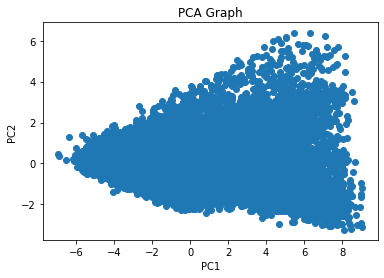

In [470]:
plt.scatter(x=pca_df.PC1, y=pca_df.PC2)
plt.title('PCA Graph')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [471]:
pca = PCA()
X = df_full.drop(['timestamp','ttf'], axis = 1)
y = df_full['ttf']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
X_train = X_train[:, :4]
X_test = X_test[:, :4]
regressor = RandomForestRegressor(n_estimators = 100, max_depth=6, random_state = 0, n_jobs=-1, verbose=False)  
regressor.fit(X_train, y_train) 
pickle.dump(regressor, open('Predictive maintenance pickles/random_forest_with_pca.pickle', 'wb'))
regressor.score(X_test, y_test)

0.7377338781823357

# Feature Engineering

In [0]:
X = df_full.drop(['timestamp', 'ttf'], 1)
y = df_full['ttf']

In [0]:
def forward_selection(df,y, confidence = 0.025):
  features_selected = []
  for _ in df.columns:
    p_values = []
    for c in df.columns:
      if c not in features_selected:
        X = df[features_selected + [c]]
        X = sm.add_constant(X)
        est = sm.OLS(y, X).fit()
        p_values.append((c,est.pvalues[-1]))
    p_values = sorted(p_values, key=lambda x: x[1])
    if p_values[0][1] < confidence:
      features_selected.append(p_values[0][0])
    else:
      break
  return features_selected

In [474]:
features_forward = forward_selection(X, y, confidence=0.005)
features_forward

/home/sachin/.local/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


['cycle',
 's2',
 's4',
 's11',
 's9',
 's7',
 's12',
 's15',
 's3',
 's13',
 's21',
 's20',
 's8',
 's17']

In [0]:
def backward_elimination(df, y, confidence = 0.025):
  features_selected = list(df.columns)
  for _ in df.columns:
    X = df[features_selected]
    X = sm.add_constant(X)
    est = sm.OLS(y, X).fit()
    p_values_series = est.pvalues[1:]
    p_values = list(zip(p_values_series.index,p_values_series))
    p_values = sorted(p_values, key=lambda x: x[1], reverse=True) # Descending Order
    if p_values[0][1] < confidence:
      break
    else:
      features_selected.remove(p_values[0][0])
  return features_selected

In [476]:
features_backward = backward_elimination(X,y, confidence=0.025)
features_backward

['cycle',
 's2',
 's3',
 's4',
 's7',
 's8',
 's9',
 's11',
 's12',
 's13',
 's15',
 's17',
 's20',
 's21']

In [477]:
X_new = X[features_backward]
X_new = sm.add_constant(X_new)
est = sm.OLS(y, X_new).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    ttf   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                     3269.
Date:                Sun, 27 Oct 2019   Prob (F-statistic):               0.00
Time:                        12:38:36   Log-Likelihood:                -97838.
No. Observations:               19606   AIC:                         1.957e+05
Df Residuals:                   19591   BIC:                         1.958e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.323e+05   2.38e+04      5.560      0.000    8.57e+04    1.79e+05
cycle         -0.4076      0.006    -73.260      0.000      -0.419      -0.397
s2            -4.8413      0.831     -5.829      0.000      -6.469      -3.213
s3            -0.2976      0.063     -4.725      0.000      -0.421      -0.174
s4            -0.4154      0.061     -6.821      0.000      -0.535      -0.296
s7             4.3780      0.603      7.265      0.000       3.197       5.559
s8           -27.0876      7.871     -3.441      0.001     -42.516     -11.659
s9            -0.2804      0.017    -16.312      0.000      -0.314      -0.247
s11          -23.3940      2.349     -9.960      0.000     -27.998     -18.790
s12            5.3132      0.798      6.658      0.000       3.749       6.877
s13          -27.0694      7.765     -3.486      0.000     -42.290     -11.849
s15          -72.0960     12.404     -5.812      0.000     -96.409     -47.783
s17           -0.8991      0.264     -3.405      0.001      -1.417      -0.382
s20            8.7506      2.476      3.534      0.000       3.897      13.604
s21           17.2837      4.159      4.155      0.000       9.131      25.437
==============================================================================
Omnibus:                     2593.876   Durbin-Watson:                   0.053
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4321.573
Skew:                           0.903   Prob(JB):                         0.00
Kurtosis:                       4.424   Cond. No.                     9.33e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.33e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [478]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2)
reg = LinearRegression()
reg.fit(X_train, y_train)
reg.score(X_test, y_test)

0.6984674103450857

# Log of Dependent Variable

In [479]:
df_no_zeros = df_full.copy()
df_no_zeros = df_no_zeros[df_no_zeros['ttf']>0]
X = df_no_zeros.drop(['timestamp', 'ttf'], 1)
y = df_no_zeros['ttf']
y = np.log(y)
regressor = RandomForestRegressor(n_estimators = 100, max_depth=6, random_state = 0, n_jobs=-1, verbose=False)  
rsquares = cross_val_score(regressor, X, y, cv=10, n_jobs=-1, verbose=100)
print('Average RSquare: ', rsquares.mean())

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
Pickling array (shape=(14,), dtype=object).
Pickling array (shape=(19517,), dtype=int64).
Pickling array (shape=(2, 19517), dtype=int64).
Memmapping (shape=(12, 19517), dtype=float64) to new file /dev/shm/joblib_memmapping_folder_8586_1123537665/8586-140625033627184-d0430bddeaea486391d76cdb93435f43.pkl
Pickling array (shape=(2,), dtype=object).
Pickling array (shape=(12,), dtype=object).
Pickling array (shape=(12,), dtype=int64).
Pickling array (shape=(19517,), dtype=float64).
Pickling array (shape=(19517,), dtype=int64).
Pickling array (shape=(17565,), dtype=int64).
Pickling array (shape=(1952,), dtype=int64).
Pickling array (shape=(14,), dtype=object).
Pickling array (shape=(19517,), dtype=int64).
Pickling array (shape=(2, 19517), dtype=int64).
Memmapping (shape=(12, 19517), dtype=float64) to old file /dev/shm/joblib_memmapping_folder_8586_1123537665/8586-140625033627184-d0430bddeaea486391d76cdb93435f43.pkl
P

# Turn into Classification Problem

In [480]:
period = 30
df_full['label'] = df_full['ttf'].apply(lambda x: 1 if x <= period else 0)
df_full.head()

,timestamp,cycle,s2,s3,s4,s7,s8,s9,s11,s12,s13,s15,s17,s20,s21,ttf,label
0,2019-01-01 00:00:00,1,641.82,1589.70,1400.60,554.36,2388.06,9046.19,47.47,521.66,2388.02,8.4195,392,39.06,23.4190,191,0
1,2019-01-01 00:00:30,2,642.15,1591.82,1403.14,553.75,2388.04,9044.07,47.49,522.28,2388.07,8.4318,392,39.00,23.4236,190,0
2,2019-01-01 00:01:00,3,642.35,1587.99,1404.20,554.26,2388.08,9052.94,47.27,522.42,2388.03,8.4178,390,38.95,23.3442,189,0
3,2019-01-01 00:01:30,4,642.35,1582.79,1401.87,554.45,2388.11,9049.48,47.13,522.86,2388.08,8.3682,392,38.88,23.3739,188,0
4,2019-01-01 00:02:00,5,642.37,1582.85,1406.22,554.00,2388.06,9055.15,47.28,522.19,2388.04,8.4294,393,38.90,23.4044,187,0


In [481]:
X = df_full.drop(['timestamp', 'ttf', 'label'], 1)
y = df_full['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((15684, 14), (3922, 14), (15684,), (3922,))

# Logistic Regression

In [482]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()
X = df_full.drop(['timestamp', 'ttf', 'label'], 1)
y = df_full['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
logisticRegr.fit(X_train, y_train)
print('Accuracy: ',logisticRegr.score(X_test, y_test))

pickle.dump(logisticRegr, open('Predictive maintenance pickles/logistic_regression.pickle', 'wb'))
accuracies = cross_val_score(logisticRegr, X, y, cv=10, n_jobs=-1)
print('Cross Validation Accuracy: ', accuracies.mean())

/home/sachin/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy:  0.9497705252422234
Cross Validation Accuracy:  0.9468000477524082


In [483]:
tp = 0
tn = 0
fp = 0
fn = 0
for i, y in enumerate(y_test):
  if y==1:
    if y_predict[i] == 1:
      tp += 1
    else:
      fn += 1
  elif y==0:
    if y_predict[i] == 0:
      tn += 1
    else:
      fp += 1

tp,tn,fp,fn

(37, 3075, 249, 561)

In [484]:
sensitivity = tp / (tp + fn)
sensitivity

0.061872909698996656

In [485]:
specificity = tn / (tn + fp)
specificity

0.9250902527075813

In [486]:
precision = tp / (tp + fp)
precision

0.12937062937062938

In [487]:
accuracy = (tn + tp) / (tn + tp + fp + fn)
accuracy

0.7934727180010199

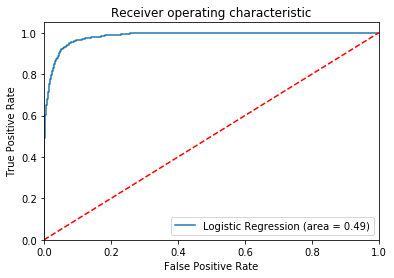

In [488]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, y_predict)
fpr, tpr, thresholds = roc_curve(y_test, logisticRegr.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [0]:
def print_model_stats(clf, X_test, y_test, threshold=0.5, prob_frequency=30, cost_matrix=None, cm=False):
  '''
  Params:
  clf --> Your fitted sklearn binary classifier
  X_test --> Test Features
  y_test --> Test Labels (Should only consist of 0's and 1's)
  threshold --> Prediction based on threshold (Default is 0.5)
  prob --> Frequency of probability annotations in ROC Curve
  cost-matrix -->  Numpy array should be of the format
  [
    [Cost_of_TP, Cost_of_FP],
    [Cost_of_FN, Cost_of_TN]
  ]
  cm --> Print Confusion Matrix and return it in the form tp,fp,fn,tn
  '''
  if cost_matrix is None:
    y_predict = (clf.predict_proba(X_test)[:,1] >= threshold).astype(int)
  elif cost_matrix.shape != (2,2):
    raise Exception('Invalid Cost Matrix Shape')
  else:
    cost_tp = cost_matrix[0][0]
    cost_fp = cost_matrix[0][1]
    cost_fn = cost_matrix[1][0]
    cost_tn = cost_matrix[1][1]
    probs = clf.predict_proba(X_test)[:,1]
    cost_true = (probs*cost_tp) + (1 - probs)*cost_fp
    cost_false = (probs*cost_fn) + (1 - probs)*cost_tn
    y_predict = (cost_true < cost_false).astype(int)
  tp = tn = fn = fp = 0
  for i, y in enumerate(y_test):
    if y==1:
      if y_predict[i] == 1: # Predicted 1 and Actual 1 --> TP
        tp += 1
      elif y_predict[i] == 0: # Predicted 0 and Actual 1 --> FN
        fn += 1
    elif y==0:
      if y_predict[i] == 0: # Predicted 0 and Actual 0 -->  TN
        tn += 1
      elif y_predict[i] == 1: # Predicted  and Actual 0 --> FP
        fp += 1
  print('Sensitivity (TPR): ',  tp / (tp + fn))
  print('Specificity (TNR): ',  tn / (tn + fp))
  print('Miss Rate (FNR): ',  fn / (tp + fn))
  print('Fall-Out (FPR): ',  fp / (tn + fp))
  print('\nAccuracy: ',  (tp + tn) / (tp + fn + tn + fp))
  print('Precision: ',  tp / (tp + fp))
  print('Kappa Score: ', cohen_kappa_score(y_test,y_predict))

  print('FP/FN Ratio: ', fp/fn)
  logit_roc_auc = roc_auc_score(y_test, clf.predict_proba(X_test)[:,1])
  fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:,1])
  plt.figure(figsize=(10,6))
  plt.plot(fpr, tpr, label='(AUC = %0.2f)' % logit_roc_auc)
  plt.plot([0, 1], [0, 1],'r--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver operating characteristic')
  plt.legend(loc="lower right")
  for i in range(len(thresholds)):
    if i%prob_frequency==0:
        plt.text(fpr[i], tpr[i], f'{thresholds[i]: .2f}')   
  plt.show()
  if cm:
    cm = confusion_matrix(y_test, y_predict)
    ax = plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax, cmap='Blues', fmt='g'); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels'); 
    ax.set_title('Confusion Matrix') 
    ax.xaxis.set_ticklabels(['-ve', '+ve'])
    ax.yaxis.set_ticklabels(['-ve', '+ve'])
    plt.show()
    return tp,fp,fn,tn

# Random Forest Classifier

/home/sachin/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Sensitivity (TPR):  0.9249146757679181
Specificity (TNR):  0.947242206235012
Miss Rate (FNR):  0.07508532423208192
Fall-Out (FPR):  0.05275779376498801

Accuracy:  0.9439061703212647
Precision:  0.754874651810585
Kappa Score:  0.7980617825534218
FP/FN Ratio:  4.0


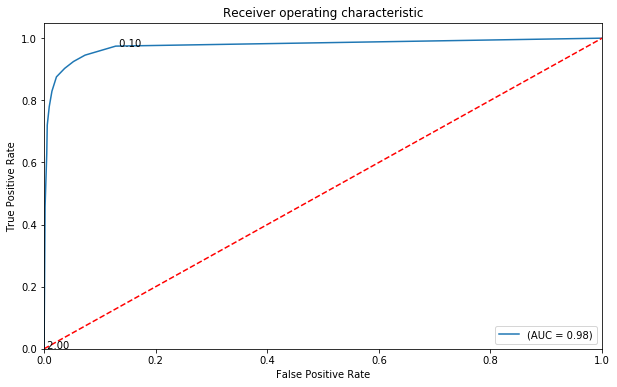

In [490]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
X = df_full.drop(['timestamp', 'ttf', 'label'], 1)
y = df_full['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
clf.fit(X_train, y_train)
pickle.dump(clf, open('Predictive maintenance pickles/random_forest_classification.pickle', 'wb'))
y_predict = clf.predict(X_test)
print_model_stats(clf, X_test,y_test, threshold=0.3, prob_frequency=10)